# Introduction to Data Science 2022

# Week 5

## Exercise 1 | Privacy and data protection

First, look up the [European Data Protection Regulation](http://eur-lex.europa.eu/legal-content/EN/TXT/PDF/?uri=CELEX:32016R0679&from=en) (“GDPR”). Note that Articles 1-99 start on p. 32 of the document. We will refer to the articles and their parts by, e.g., “Art 6 (1) a) GDPR” which means Article 6 (“Lawfulness of processing”), first paragraph, item a in the GDPR.

1. Valid Consent?

    Find a service you use to which you have given *consent* for the processing of your personal data (Art 6 (1) a) GDPR). Have a look at the privacy notices, policies, or settings of this service.

    - Are the basic legal conditions for this consent in your opinion in line with the new requirements and conditions set by the GDPR?

    - You should provide an answer with justification based on the GDPR, where you refer to specific articles and paragraphs.

2. Your Right to Access your Personal Data

    You have the right to know if personal data about you is processed by a controller. You also have the right to get access to, for example, the processing purposes, the data categories, data transfers, and duration of storage.

    - Find the relevant parts in GDPR and study your rights as a “data subject”.

    - File a right-to-access request with a data processing service of your choosing. Describe the mechanism that is put in place by the service to enable you to exercise this right (if any).

    - Whether you get a response or not, think about how well your rights as a data subject are respected in practice. Your answer should again refer to specific articles and paragraphs of the GDPR.

3. Anonymisation & Pseudonymisation

    - What is the difference between anonymisation and pseudonymisation of personal data?

**Submit your findings in a PDF file, just a short report is enough.**

## Exercise 2 | Fairness-aware AI

This template generates data about the working hours and salaries of n=5000 people. The salary equals 100 x working hours plus/minus normal distributed noise. If you run the template, it produces a scatter plot with gender=0 (men) in orange and gender=1 (women) in orange. The plot includes a trend line for each group, and an overall trend line for all data combined (in red). A linear regression model learned from the data *without* the protected characteristic (gender) should have slope close to 100.0

Now edit the code to simulate the following scenarios:

a) the salary of women is reduced by 200 euros ("direct discrimination")

b) the working hours of men are binomially distributed with parameters (60, 0.55) while the working hours of women are binomially distributed with parameters (60, 0.45) ("no discrimination")

c) both of the above changes at the same time ("indirect discrimination")

You should be able to demonstrate that the slope of the linear regression model is only changed in one of these scenarios. Explain this observation using the causal models on pp. 48-50 of the slides of Lecture 9.

In [2]:
# % matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Simulating the data

In [24]:
#sample size n
n = 5000

# gender
gen = np.random.binomial(1, 0.5, size=n)

# work hours
hrs = np.random.binomial(60, 0.5, size=n)

# salary = 100 * hours + noise (std.deviation 10)
sal = hrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": sal})

In [26]:
# reduce salary by 200 euros for women

reduced_sal = hrs * np.random.normal(100, 10, size=n) - gen*200
reduced_womens_salary_data = pd.DataFrame({"Gender": gen, "Hours": hrs, "Salary": reduced_sal})

In [54]:
# working hours of men binomially distributed with parameters (60, 0.55) 
# working hours of women binomially distributed with parameters (60, 0.45) ("no discrimination")
# gender
mixedgen = np.random.binomial(1, 0.5, size=n)

# work hours
menshrs = np.random.binomial(60, 0.55, size=n)
womensshrs = np.random.binomial(60, 0.45, size=n)

mixedhrs = ((-1*(mixedgen-1))*menshrs) + (mixedgen*womensshrs)
# # salary = 100 * hours + noise (std.deviation 10)
mixedsal = mixedhrs * np.random.normal(100, 10, size=n) 

# create a nice data frame
mixeddata = pd.DataFrame({"Gender": mixedgen, "Hours": mixedhrs, "Salary": mixedsal})

(5000,)


In [74]:
# Model both changes: (1) reduced women's salary & (2) working hours modified
combinedgen = np.random.binomial(1, 0.5, size=n)

# work hours
menschrs = np.random.binomial(60, 0.55, size=n)
womenschrs = np.random.binomial(60, 0.45, size=n)

combinedhrs = (-1*(combinedgen-1)*menschrs) + (combinedgen*womenschrs)

# get the combined salary array
combinedsal = combinedhrs * np.random.normal(100, 10, size=n) 
# subtract 200 from the salary of all women
combinedsal = combinedsal - combinedgen*200

# create a nice data frame

combineddata = pd.DataFrame({"Gender": combinedgen, "Hours": combinedhrs, "Salary": combinedsal})

### Scatterplot of the simulated data
Women samples (gender = 1) are shown with blue, men samples (gender = 0) are shown in orange.
Blue and orange lines are the trend lines of each group accordingly.
The overall trend line is shown in red.

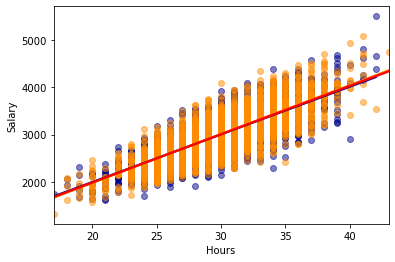

In [28]:
sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")

plt.show()

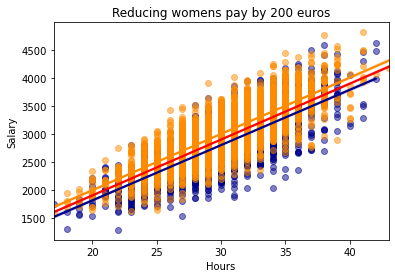

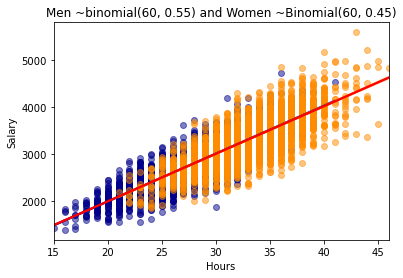

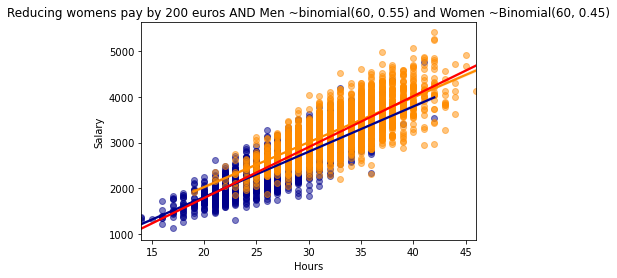

In [76]:
def plot_data(givendata, title):
    sns.regplot(x="Hours", y="Salary", data=givendata[givendata["Gender"]==1], color="darkBlue", scatter_kws={'alpha':0.5})

    sns.regplot(x="Hours", y="Salary", data=givendata[givendata["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})

    sns.regplot(x="Hours", y="Salary", data=givendata, marker="None", color="red").set(title=title)

    plt.show()
    
plot_data(reduced_womens_salary_data, 'Reducing womens pay by 200 euros')
plot_data(mixeddata, 'Men ~binomial(60, 0.55) and Women ~Binomial(60, 0.45)')
plot_data(combineddata, 'Reducing womens pay by 200 euros AND Men ~binomial(60, 0.55) and Women ~Binomial(60, 0.45)')

### Linear regression
Learn the overall regression model, which is what an algorithm with no access to the gender ("protected characteristic") would learn from the data.

In [77]:
reg = LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))

def get_reg(hrs, sal):
    reg= LinearRegression().fit(hrs.reshape(-1,1), sal.reshape(-1,1))
    return reg.coef_

# print out the slope: it should be close to 100.0 without learning the 'protected characteristic' (gender)
print("slope of first (no changes): %.1f" % reg.coef_)
print("slope of women's reduced pay: %.1f" % get_reg(hrs, reduced_sal))
print("slope with different binomial parameters based on gender: %.1f" % get_reg(mixedhrs, mixedsal))
print("slope with diff binomial params plus women's reduced pay: %.1f" % get_reg(combinedhrs,combinedsal))

slope of first (no changes): 102.0
slope of women's reduced pay: 99.6
slope with different binomial parameters based on gender: 101.0
slope with diff binomial params plus women's reduced pay: 111.8


**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**